In [ ]:
# # Location of dataset on machine
# personal_file_base = "C:/Users/laela/large_datasets/CSE 543 Dataset/"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import tensorflow
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import seaborn as sn
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# # Create dataframe from CSV files

# # Load the CSV file into a pandas DataFrame
# shared_file_base = "MachineLearningCSV/MachineLearningCVE/"
# all_df_paths = ["Monday-WorkingHours.pcap_ISCX.csv", "Tuesday-WorkingHours.pcap_ISCX.csv", "Wednesday-workingHours.pcap_ISCX.csv", "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv","Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv", "Friday-WorkingHours-Morning.pcap_ISCX.csv", "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv", "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"]
# df_paths = ["Wednesday-workingHours.pcap_ISCX.csv", "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"]
# df = pd.DataFrame()
# for df_path in df_paths:
#     day_df = pd.read_csv(personal_file_base + shared_file_base + df_path)
#     df = pd.concat([df, day_df], ignore_index=True)
# print(df.shape)

In [ ]:
# # Dataframe preprocessing

# # Removes unnecessary white space from column names
# df.columns = df.columns.str.strip()

# features_all_0 = ["Bwd PSH Flags", "Fwd URG Flags", "Bwd URG Flags", "CWE Flag Count", "Fwd Avg Bytes/Bulk", "Fwd Avg Packets/Bulk", "Fwd Avg Bulk Rate", "Bwd Avg Bytes/Bulk", "Bwd Avg Packets/Bulk", "Bwd Avg Bulk Rate"]
# features_dervived = ['Flow Bytes/s', 'Flow Packets/s', 'Fwd Packets/s', 'Bwd Packets/s']
# features_categorical = ['Label']
# #features_negative_values = ['Flow Duration', 'Flow IAT Mean', 'Flow IAT Max', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'min_seg_size_forward']
# #features_large_negative_values = ['Flow IAT Min', 'Fwd IAT Min', 'Fwd Header Length', 'Fwd Header Length.1']

# # Removes some features
# df_feature_selection = df.drop(columns=features_all_0, axis=1)
# df_feature_selection = df_feature_selection.drop(columns=features_dervived, axis=1)

# # Remove samples with invalid features (about half of samples)
# df_feature_selection = df_feature_selection.replace(range(-14, 0), np.nan).dropna()

# # Converts categorical data into numerical data
# feature_mappings = {}
# for feature in features_categorical:
#     label_encoder = LabelEncoder()
#     df_feature_selection[feature] = label_encoder.fit_transform(df_feature_selection[feature])
#     mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
#     print(f"Mapping for feature '{feature}': {mapping}") # 'BENIGN': 440031+97718=537749, 'DDoS': 128027, 'DoS GoldenEye': 10293, 'DoS Hulk': 231973, 'DoS Slowhttptest': 5499, 'DoS slowloris': 5796, 'Heartbleed': 11
#     for index, value in mapping.items():
#         feature_mappings[value] = index
# # Converts port numbers from categorical to numerical
# def replace_port_numbers(x):
#     return 1 if x == 80 else 0
# df_feature_selection['Destination Port'] = df_feature_selection['Destination Port'].apply(replace_port_numbers)

# print(df_feature_selection.shape)
# X = df_feature_selection.drop(['Label'], axis=1)
# y = df_feature_selection['Label']

# # Compute the correlation of each feature with the target
# correlations = abs(X.corrwith(pd.Series(y)))

# # Display the correlations
# pd.set_option('display.max_rows', None) # Display all rows
# correlations = correlations.sort_values(ascending=False)

# X = X.drop(correlations.index[25:], axis=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42

In [ ]:
# Begining of data preprocessing code added by Ahmad
df1 = pd.read_csv('/content/drive/MyDrive/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df2 = pd.read_csv("/content/drive/MyDrive/Wednesday-workingHours.pcap_ISCX.csv")
df = pd.concat([df1, df2], axis=0)

df.columns = df.columns.str.strip() # Removes unnecessary white space from column names

label = {   # Labelling the target variable with numeric values
    'BENIGN': 0,
    'DDoS': 1,
    'DoS slowloris': 1,
    'DoS Slowhttptest': 1,
    'DoS Hulk': 1,
    'DoS GoldenEye': 1,
    'Heartbleed': 2
}

df['Label'] = df['Label'].map(label) # mapping the labels to their numeric values in df

df = df.dropna() # Removing rows that contain NaN values in df
df = df[~df.isin([np.inf, -np.inf]).any(axis=1)] # Removing rows that contain inf values in df
df = df.loc[:, (df != 0).any(axis=0)] # Removing columns that only contain 0s in df
df.drop(df[df['Label'] == 2].index, inplace = True) # Removing the Heartbleed data (only 11 present)

def replace_port_numbers(x):
     return 1 if x == 80 else 0

df['Destination Port'] = df['Destination Port'].apply(replace_port_numbers)

X = df.drop(columns=['Label'])
y = df['Label']

correlations = abs(X.corrwith(pd.Series(y)))
correlations = correlations.sort_values(ascending=False)
X = X.drop(correlations.index[25:], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# End of data preprocessing code added by Ahmad

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Reshape the data (for example, to a 2D image-like structure)
# This depends on how you want to visualize your data.
# Here, we assume a single-channel image.

# Determine the size of your "image" representation
print(X_train.shape)
height, width = 68, 1  # For example, reshape your features into a 10x7 "image"
X_train_reshaped = X_train.reshape(-1, height, width, 1)
X_test_reshaped = X_test.reshape(-1, height, width, 1)

# Convert to one-hot encoding
num_classes = 2  # Change this to the number of classes you have
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

print(X_train_reshaped.shape, X_test_reshaped.shape)

(733693, 68)
(733693, 68, 1, 1) (183424, 68, 1, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout

# Create a Sequential model
model = Sequential()

# Use Conv1D instead of Conv2D
# model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(25, 1)))  # Change (1, 25, 1) to (25, 1)
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(25, 1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # 6 output classes

# Compile the model with categorical crossentropy loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Use EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train_reshaped, y_train_one_hot, epochs=5, batch_size=32, validation_data=(X_test_reshaped, y_test_one_hot), callbacks=[early_stopping])

Epoch 1/5
22928/22928 ━━━━━━━━━━━━━━━━━━━━ 173s 7ms/step - accuracy: 0.9868 - loss: 0.0398 - val_accuracy: 0.9952 - val_loss: 0.0146
Epoch 2/5
22928/22928 ━━━━━━━━━━━━━━━━━━━━ 160s 7ms/step - accuracy: 0.9944 - loss: 0.0178 - val_accuracy: 0.9959 - val_loss: 0.0126
Epoch 3/5
22928/22928 ━━━━━━━━━━━━━━━━━━━━ 146s 6ms/step - accuracy: 0.9950 - loss: 0.0148 - val_accuracy: 0.9950 - val_loss: 0.0159
Epoch 4/5
22928/22928 ━━━━━━━━━━━━━━━━━━━━ 155s 7ms/step - accuracy: 0.9952 - loss: 0.0143 - val_accuracy: 0.9956 - val_loss: 0.0138
Epoch 5/5
22928/22928 ━━━━━━━━━━━━━━━━━━━━ 157s 7ms/step - accuracy: 0.9954 - loss: 0.0139 - val_accuracy: 0.9957 - val_loss: 0.0131


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test_one_hot)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

# Make predictions
y_pred = model.predict(X_test_reshaped)
y_pred_classes = (y_pred > 0.5).astype(int)  # For classification

5732/5732 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9959 - loss: 0.0126
Loss: 0.0126, Accuracy: 0.9959
5732/5732 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


In [ ]:
# Evaluate the model's performance
y_pred_integer = np.argmax(y_pred_classes, axis=1)
y_test_integer = np.argmax(y_test_one_hot, axis=1)
accuracy = accuracy_score(y_test_integer, y_pred_integer)
precision = precision_score(y_test_integer, y_pred_integer, average='weighted')
recall = recall_score(y_test_integer, y_pred_integer, average='weighted')
f1 = f1_score(y_test_integer, y_pred_integer, average='weighted')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Output predictions
print(f'Predictions: {y_pred_integer}')

Accuracy: 0.9959220167480809
Precision: 0.9959564593082019
Recall: 0.9959220167480809
F1 Score: 0.9959238099465962
Predictions: [0 1 0 ... 1 1 1]


In [ ]:
# # Generates confusion matrix
# class_labels = [feature_mappings[mapping] for mapping in np.unique(y_test_integer)]
# cf_matrix = confusion_matrix(y_test_integer, y_pred_integer, labels=np.unique(y_test_integer))
# df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index=class_labels, columns=class_labels)
# plt.figure(figsize=(8, 8))
# sn.heatmap(df_cm, annot=True)
# plt.show()

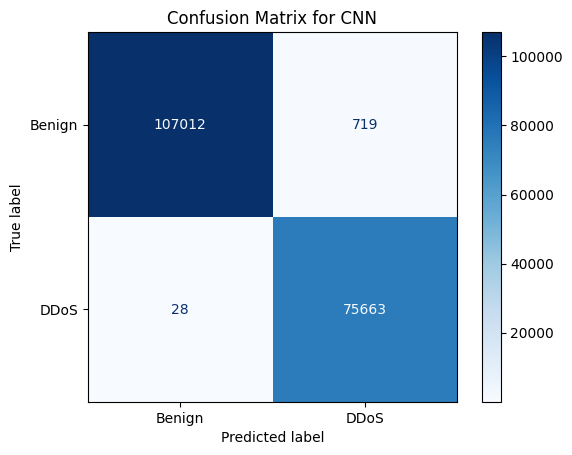

In [ ]:
#Beginning of Confusion Matrix: Yesha Modi
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Filter predictions and true labels to include only Benign (0) and DDoS (1)
y_test_binary = y_test[y_test.isin([0, 1])]
y_pred_binary = y_pred[y_test.isin([0, 1])][:, [0,1]].argmax(axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary, labels=[0, 1])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'DDoS'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for CNN")
plt.show()
#Ending of Confusion Matrix: Yesha Modi

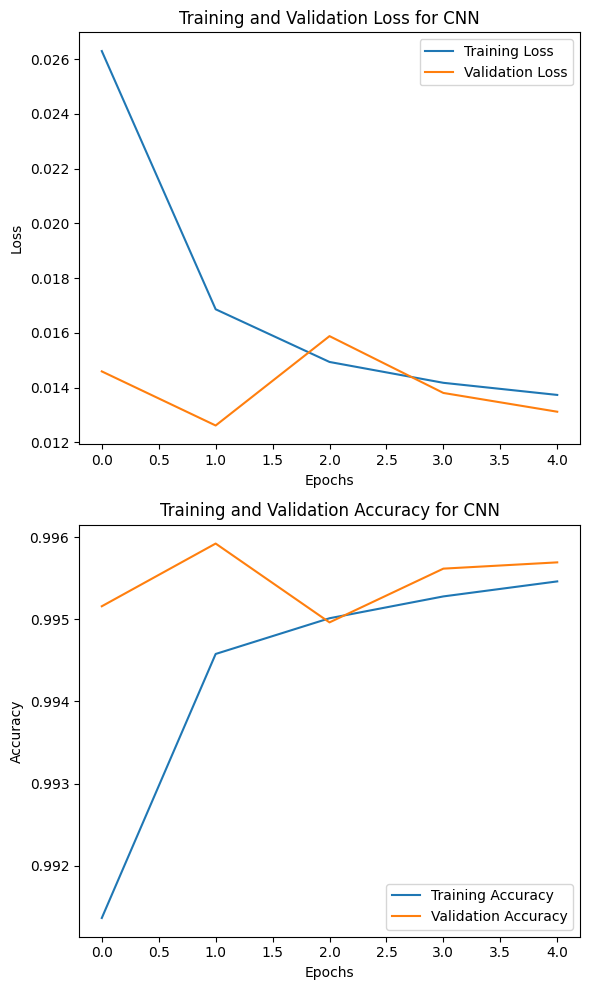

In [ ]:
import matplotlib.pyplot as plt

# Assuming `history` is the History object returned by model.fit()
# Plotting training & validation loss
plt.figure(figsize=(6, 10))

# Loss plot
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for CNN')
plt.legend()

# Accuracy plot
plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for CNN')
plt.legend()

plt.tight_layout()
plt.show()